<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values()) + 1
maxlen = 256

print(f'{len(X_train)} train sequences')
print(f'{len(X_test)} test sequences')

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

for x in X_train, X_test:
    print(x.shape)

num_categories = len(set(list(y_train) + list(y_test)))
print('Build model...')
model = Sequential([
    Embedding(max_features, 128),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(num_categories, activation='softmax')
])

8982 train sequences
2246 test sequences
(8982, 256)
(2246, 256)
Build model...


In [4]:
#Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(X_test, y_test))

score, acc_score = model.evaluate(X_test, y_test,
                                  batch_size=batch_size,
                                  verbose=False)
print(f'Test score is {score}')
print(f'Test accuracy is {acc_score}')

Train on 8982 samples, validate on 2246 samples
Epoch 1/2
8982/8982 [==============================] - 234s 26ms/sample - loss: 2.2313 - accuracy: 0.4399 - val_loss: 1.8128 - val_accuracy: 0.5289
Epoch 2/2
8982/8982 [==============================] - 232s 26ms/sample - loss: 1.7733 - accuracy: 0.5331 - val_loss: 1.6854 - val_accuracy: 0.5717
Test score is 1.6853950518321905
Test accuracy is 0.5716829895973206


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

*The pad_sequences method helps create a set of  inputs with lengths equal to set maxlen, which is 256, and add zeros as default value to any inputs which are less than 256 in length.*


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

*LSTM provides a memory cell capable of retaining previous information while RNNs tends to diminish memory*


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

*The 3 use cases of LSTMs are Text Classification, Sequence Prediction, and Handwritting Digit Recognition*

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

In [5]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2 to help resize the images prior to inference. 

In [6]:
from skimage.io import imread_collection

images = imread_collection('./frog_images/*.jpg')

In [7]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [8]:
import os, sys
img_dir = "./frog_images"

#Load images to list
images = []
for i in os.listdir(img_dir):
    if os.path.isfile(os.path.join(img_dir, i)) and i[-3:] == 'jpg':
        images.append(i)

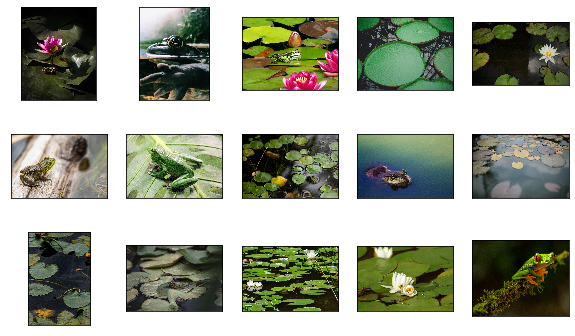

In [10]:
import matplotlib.pyplot as plt
import skimage
from skimage.io import imread

img_list = [skimage.io.imread(f'./frog_images/{img}') for img in os.listdir(img_dir) if img[-3:] == 'jpg']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list[i], cmap=plt.cm.binary)
plt.show()

In [11]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from PIL import Image
from sklearn.preprocessing import LabelEncoder

resnet = ResNet50V2(weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

frogs = ['bullfrog', 'tree_frog', 'tailed_frog']

def img_path(I):
    return image.load_img(I, target_size=(224, 224))

def frog_img(Y):
    x = image.img_to_array(Y)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50V2(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=5)[0]
    print(results)
    for i in results:
        if i[1] in frogs:
            return 'Frog'
        else:
            pass
    return 'No frog'

In [20]:
print(Image.__file__)

C:\Users\Predator\Anaconda3\envs\U4-S1-NLP\lib\site-packages\PIL\Image.py


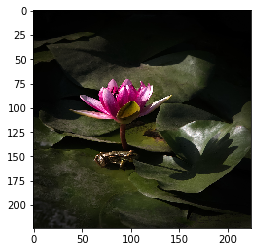

40960/35363 [==================================] - 0s 1us/step
[('n03991062', 'pot', 0.43382093), ('n04522168', 'vase', 0.18519527), ('n07745940', 'strawberry', 0.0843347), ('n07614500', 'ice_cream', 0.02508409), ('n02206856', 'bee', 0.02416194)]
No frog



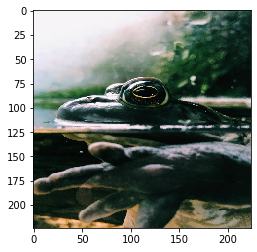

[('n01641577', 'bullfrog', 0.99599886), ('n02655020', 'puffer', 0.0024455928), ('n01667778', 'terrapin', 0.0010096618), ('n01644900', 'tailed_frog', 0.00030852645), ('n02643566', 'lionfish', 8.515817e-05)]
Frog



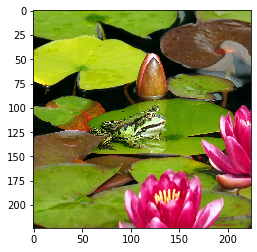

[('n02190166', 'fly', 0.9926628), ('n02206856', 'bee', 0.0046893195), ('n02256656', 'cicada', 0.000959647), ('n02259212', 'leafhopper', 0.0006176796), ('n02236044', 'mantis', 0.00021235026)]
No frog



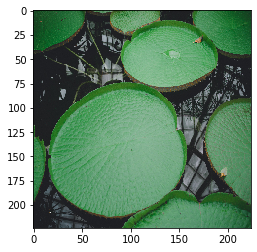

[('n04258138', 'solar_dish', 0.26390037), ('n03249569', 'drum', 0.23506753), ('n03250847', 'drumstick', 0.050987437), ('n02877765', 'bottlecap', 0.045858834), ('n03920288', 'Petri_dish', 0.04127177)]
No frog



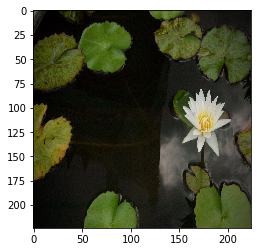

[('n04476259', 'tray', 0.34925038), ('n11939491', 'daisy', 0.29559788), ('n03485794', 'handkerchief', 0.095768094), ('n02840245', 'binder', 0.07851927), ('n03938244', 'pillow', 0.025608188)]
No frog



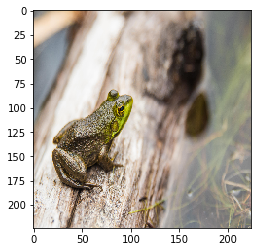

[('n01644900', 'tailed_frog', 0.67169446), ('n01644373', 'tree_frog', 0.2743905), ('n01641577', 'bullfrog', 0.04809459), ('n01695060', 'Komodo_dragon', 0.0019306003), ('n01687978', 'agama', 0.0016584572)]
Frog



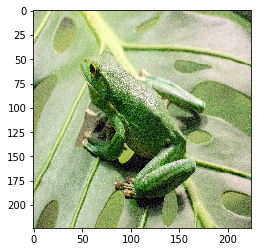

[('n01644373', 'tree_frog', 0.95609725), ('n01644900', 'tailed_frog', 0.04311661), ('n01641577', 'bullfrog', 0.00076295476), ('n02226429', 'grasshopper', 1.0363732e-05), ('n02236044', 'mantis', 3.2019027e-06)]
Frog



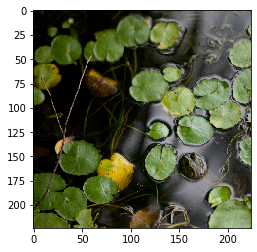

[('n03991062', 'pot', 0.47875652), ('n03697007', 'lumbermill', 0.07329468), ('n07734744', 'mushroom', 0.056395676), ('n13054560', 'bolete', 0.05583345), ('n13052670', 'hen-of-the-woods', 0.051387694)]
No frog



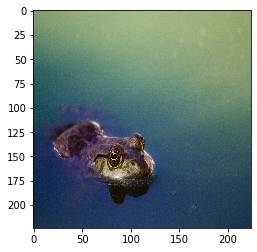

[('n01641577', 'bullfrog', 0.72788364), ('n02655020', 'puffer', 0.1746789), ('n02398521', 'hippopotamus', 0.04314919), ('n01644900', 'tailed_frog', 0.041289397), ('n01698640', 'American_alligator', 0.010093093)]
Frog



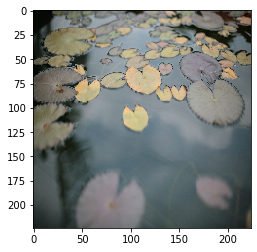

[('n04033995', 'quilt', 0.27399725), ('n11939491', 'daisy', 0.1783701), ('n04209239', 'shower_curtain', 0.07157734), ('n03938244', 'pillow', 0.04880459), ('n03930313', 'picket_fence', 0.039503757)]
No frog



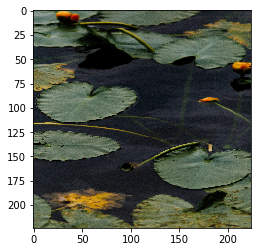

[('n12620546', 'hip', 0.38287073), ('n12267677', 'acorn', 0.10583454), ('n01737021', 'water_snake', 0.06150808), ('n02017213', 'European_gallinule', 0.060256027), ('n03598930', 'jigsaw_puzzle', 0.04829929)]
No frog



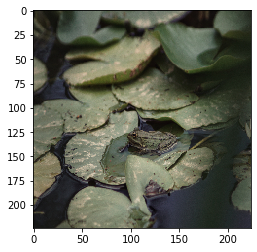

[('n01737021', 'water_snake', 0.30644026), ('n01945685', 'slug', 0.0730994), ('n13044778', 'earthstar', 0.071999006), ('n12267677', 'acorn', 0.05953927), ('n01729322', 'hognose_snake', 0.05729498)]
No frog



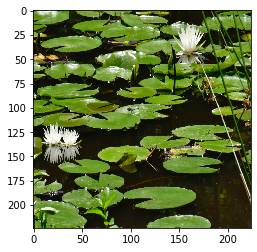

[('n11939491', 'daisy', 0.81456673), ('n03598930', 'jigsaw_puzzle', 0.089548655), ('n03457902', 'greenhouse', 0.0077825477), ('n04355338', 'sundial', 0.0067284126), ('n04326547', 'stone_wall', 0.0065646)]
No frog



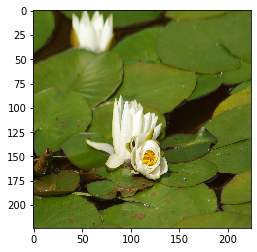

[('n01944390', 'snail', 0.8160968), ('n02280649', 'cabbage_butterfly', 0.02727245), ('n01737021', 'water_snake', 0.022942403), ('n11939491', 'daisy', 0.022666868), ('n01943899', 'conch', 0.017791184)]
No frog



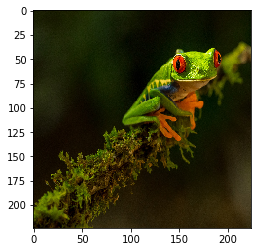

[('n01644373', 'tree_frog', 0.99617517), ('n01693334', 'green_lizard', 0.0020103832), ('n01644900', 'tailed_frog', 0.0013048033), ('n01694178', 'African_chameleon', 0.00022511516), ('n01641577', 'bullfrog', 0.00013091203)]
Frog



In [21]:
path = './frog_images/'

paths = os.listdir(path)

for file in paths:
    img = img_path(path+file)
    plt.imshow(img)
    plt.show()
    prediction = frog_img(img)
    print(prediction)
    print()

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
*A typical example would be using an autoencoder to denoise an image. It would take the image and predict what the values would be in the pixels that are noisy in order to smooth out a picture and make it much cleaner. In other words, it would predict it's own input via the compression then decompression back to the input in the layers.*

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
 *As of now, my strongest area would be Maths/Statistics*
- What area of Data Science would you most like to learn more about, and why?
 *OOP, python, SQL, Flask, and Machine LEarning. I still need to improve in these areas*
- Where do you think Data Science will be in 5 years?
 *Data Science will be one of the most popular major in tech world*
- What are the threats posed by AI to our society?
 *The overuse of AI may soon replace human workforce in labor*
- How do you think we can counteract those threats?
 *Continue to improve AI but still leave jobs for human worker*
- Do you think achieving General Artifical Intelligence is ever possible?
 *With such great pace of technology improvement, I think it is possible.*

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [ ]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")